In [1]:
import numpy as np
import matplotlib.pyplot as plt

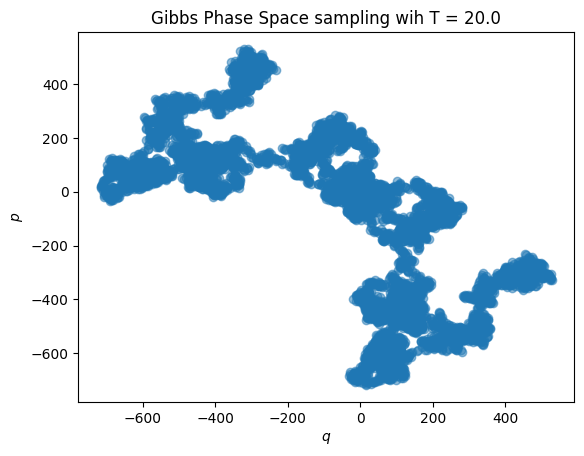

In [2]:
# parametri fisici
k_B = 1.
m = 1.
omega = 1.


def conditional_distribution_q(p, T):
    
    beta = 1/(k_B*T)
    """
    Distribuzione condizionale per q data p nella distribuzione di Gibbs.
    """
    return np.random.normal(p, np.sqrt(m/beta))

def conditional_distribution_p(q, T):
    
    beta = 1/(k_B*T)
    """
    Distribuzione condizionale per p data q nella distribuzione di Gibbs.
    """
    return np.random.normal(q, 1.0 / np.sqrt(beta*m*omega*omega))

def gibbs_sampler(num_samples, T, initial_q, initial_p):
    """
    Implementazione dell'algoritmo di campionamento di Gibbs per la distribuzione di Gibbs.
    
    Args:
        num_samples: Il numero di campioni da generare.
        beta: Il parametro inverso di temperatura.
        initial_x: Il valore iniziale per x.
        initial_y: Il valore iniziale per y.
        
    Returns:
        Due array contenenti i campioni x e y campionati dalla distribuzione di Gibbs.
    """
    q_samples = [initial_q]
    p_samples = [initial_p]
    
    for _ in range(num_samples):
        new_q = conditional_distribution_q(p_samples[-1], T)
        new_p = conditional_distribution_p(q_samples[-1], T)
        
        q_samples.append(new_q)
        p_samples.append(new_p)
    
    return np.array(q_samples), np.array(p_samples)

# Parametri
num_samples = 10000
T = 20.0
initial_q = 0.0
initial_p = 0.0

# Campionamento utilizzando l'algoritmo di Gibbs
q_samples, p_samples = gibbs_sampler(num_samples, T, initial_q, initial_p)

# Plot dei risultati
plt.scatter(q_samples, p_samples, alpha=0.5)
plt.xlabel("$q$")
plt.ylabel("$p$")
plt.title("Gibbs Phase Space sampling wih T = {}".format(T))
plt.show()

In [ ]:
np.mean()

In [3]:
from mpl_toolkits.mplot3d import Axes3D

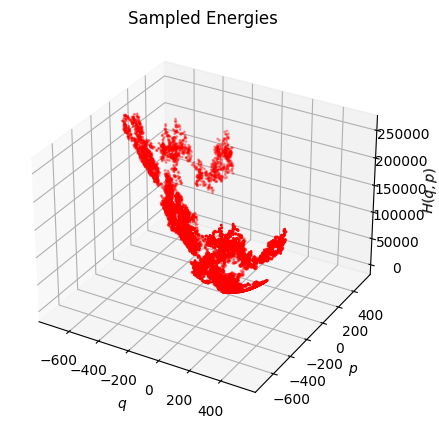

In [4]:
# Dati di esempio
energy = p_samples*p_samples/(2*m) + (m*omega*omega)*q_samples*q_samples/2

# Crea una figura e un'area 3D
fig = plt.figure(figsize = (5, 5))
ax = fig.add_subplot(111, projection='3d')

# Crea lo scatter plot in 3D
ax.scatter(q_samples, p_samples, energy, c='r', marker='o', s=1.2)

# Etichette degli assi
ax.set_xlabel('$q$')
ax.set_ylabel('$p$')
ax.set_zlabel('$H(q,p)$')

# Titolo del plot
ax.set_title('Sampled Energies')

# Mostra il plot
plt.show()

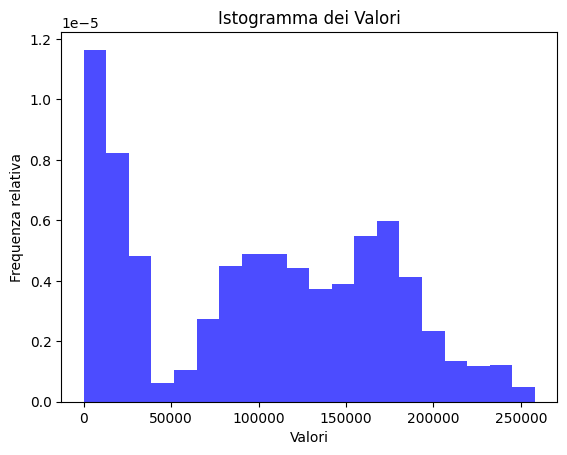

In [5]:
# Crea l'istogramma
plt.hist(energy, bins=20, density=True, alpha=0.7, color='blue')  # `bins` definisce il numero di bin nell'istogramma

# Aggiungi etichette e titolo
plt.xlabel('Valori')
plt.ylabel('Frequenza relativa')
plt.title('Istogramma dei Valori')

# Mostra il plot
plt.show()

In [6]:
np.sqrt(1000)

31.622776601683793